<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: TEAM 6

In [2]:

# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# importing transformed dataset
file = './datasets/ames_transformed.xlsx'


# reading the file into Python
housing = pd.read_excel(io     = file,
                        header = 0   )

# importing interval and count data
file = "./datasets/ames_non_continuous.xlsx" 

housing_2 = pd.read_excel(io         = file,
                          header     = 0,
                          sheet_name = 'interval_count')


# merging the two datasets
housing = housing.merge(right = housing_2,
                        on    = 'property_id',
                        how   = 'inner') 

# outputting the first ten rows of the dataset
housing.head(n=10)

FileNotFoundError: [Errno 2] No such file or directory: './datasets/ames_transformed.xlsx'

1. Quality Score:
    This feature reflects the quality and condition of the house, therefore houses with a higher Quality Score should have a higher Sale Price. Given that houses built with better materials and in better condition are more desirable for buyers. The correlation between Quality Score and the response variables should be positive. We believe this feature is useful because it combines quality and condition of the house, two very important metrics that are often seen in the same light, into a single number. 
    
    
2. Bedroom to Bathroom Ratio:
    Being able to know how many rooms could have a particular bathroom is a great feature to have, it goes beyond number of bathrooms and elevates the utility of the metric. It could even work as a good filter for buyers trying to find an appropriate house for their families. We believe this feature will have a negative correlation to both Sale_Price and log_Sale_Price. As the ratio increases the house becomes less desirable because there are more rooms that lack their own bathroom. We hypothesis that if thats the case, the Sale_Price will decrease with an increasing Bedroom_to_Bathroom_Ratio.
    
        
3. Quality to Area Ratio:
    Assuming that the market values quality over size we believe the Quality to Area Ratio (Q2A_Ratio) will have a positive correlation to both response variables. In a market that is willing to sacrifice size to obtain a higher quality house, houses with a higher Q2A_Ratio should be more desirable. This increase in desirability should therefore increase the Sale_Price of the house. We believe this feature has two utilities, one is to help us determine what the market values more, size or quality. The second use for this feature is for small families or single buyers who want a quality house even if it's smaller than other houses. 




In [1]:
# Feature 1: Quality_Score

# Setting the feature in the housing data frame
housing['Quality_Score'] = housing['Overall_Qual'] * housing['Overall_Cond']

# Display the first few rows of the datasets to confirm the new features
housing.head()


NameError: name 'housing' is not defined

In [9]:
#FEATURE 2# BEDROOM TO BATHROOM RATIO

# Assuming 'TotRms_AbvGr' includes 1 kitchen, at least 1 living room, and a variable number of full and half bathrooms.
# We'll subtract 1 for the kitchen, 1 for the living room, and 1 for each bathroom counted by 'Full_Bath' and 'Half_Bath'.
# This is a simplification and the actual number may vary if, for example, homes have multiple living rooms or kitchens.
housing['Assumed_Bedrooms'] = housing['TotRms_AbvGr'] - 1 - housing['Full_Bath'] - housing['Half_Bath'] - 1

# Ensure that the assumed number of bedrooms is not less than 1
housing['Assumed_Bedrooms'] = housing['Assumed_Bedrooms'].clip(lower=1)

# Calculate the Bedroom_to_Bathroom_Ratio with the assumed number of bedrooms
# Adding 0.5 for each Half_Bath to count it as a half bathroom in the total
housing['Bedroom_to_Bathroom_Ratio'] = housing['Assumed_Bedrooms'] / (housing['Full_Bath'] + 0.5 * housing['Half_Bath'])

# Display the new feature along with relevant existing features for verification
print(housing[['property_id', 'Assumed_Bedrooms', 'Full_Bath', 'Half_Bath', 'Bedroom_to_Bathroom_Ratio']].head())


   property_id  Assumed_Bedrooms  Full_Bath  Half_Bath  Bedroom_to_Bathroom_Ratio
0            1                 4          1          0                   4.000000
1            2                 2          1          0                   2.000000
2            3                 2          1          1                   1.333333
3            4                 3          2          1                   1.200000
4            5                 1          2          1                   0.400000


In [10]:
#FEATURE 3: QUALITY TO AREA RATIO

# Setting the feature in the housing data frame
housing['Q2A_Ratio'] = housing['Overall_Qual'] / housing['Gr_Liv_Area']

# Printing relevant features
print(housing[['property_id', 'Overall_Qual', 'Gr_Liv_Area', 'Q2A_Ratio']].head())


   property_id  Overall_Qual  Gr_Liv_Area  Q2A_Ratio
0            1             6         1656   0.003623
1            2             5          896   0.005580
2            3             6         1329   0.004515
3            4             7         2110   0.003318
4            5             5         1629   0.003069


In [11]:
# SUMMARY : CORRELATIONS

#Setting the correlations method and rounding the result to two decimal places
df_corr = housing.corr(method = 'pearson').round(2)

# Saving the correlation matrix as df_corr to use it for the heatmap 
df_corr = df_corr.loc[ ['Q2A_Ratio', 'Bedroom_to_Bathroom_Ratio', 'Quality_Score'] , ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                                ascending = False)

<br>

<br>

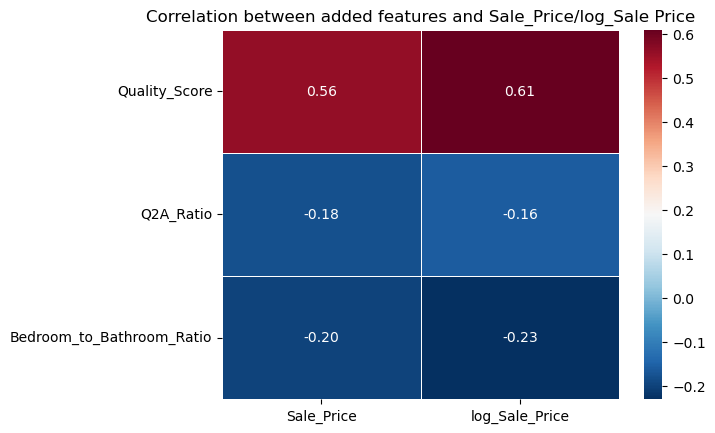

In [12]:
# Creating a heatmap explaning the correlations between the added features and Sale_price and log_Sale_Price
sns.heatmap(df_corr, annot=True, cmap='RdBu_r', linewidths=.5, fmt=".2f")
plt.title('Correlation between added features and Sale_Price/log_Sale Price') # Adding a title to the plot 
plt.show()




As expected, the Quality_Score feature had a strong possible correlation to both Sale_Price and log_Sale_Price. It makes logical sense that houses that are better built and that are in better condition sell for a higher price.

Regarding the Quality to Area ratio (Q2A_Ratio), although small, there is a negative correlation between this feature and the response variables. Based on the premise that the market would value quality over size we expected the relationship to be positive. A possible explanation is that the market values size and quality together, so in this case this feature is not a good predictor of sale price, which would also explain the weak correlation. 

The Bedroom_to_Bathroom_Ratio, as hypothesized, shows a small negative correlation with both Sale_Price and log_Sale_Price. This makes sense taking into account that houses with more bathrooms are more expensive and that buyers prefer having sufficient bathrooms for the number of bedrooms in the house. 


